0. 개요
1. Library & Data Import
2. 데이터셋 살펴보기
3. 텍스트 전처리
    1. 정규표현식 적용
    2. 말뭉치 만들기
    3. 토큰화
    4. Word count 
        - Bag of words
        - TF-IDF 변환
4. 감성 분석
    1. 데이터셋 생성
        - Label
        - Feature
    2. Training set / Test set 나누기
    3. Logistic regression 모델 학습
5. 긍정/부정 키워드 분석
6. 호텔리뷰 감성 (긍정/부정) 예측함수
    1. Logistic regression
    2. SVM
    3. Decision tree
    4. Random forest
    5. KNN
    6. LSTM
    7. Grid search
    8. 각 모델별 AUC score 비교
7. 개선점

# 0. 개요

https://hyemin-kim.github.io/2020/08/29/E-Python-TextMining-2/#5-%EA%B8%8D%EC%A0%95-%EB%B6%80%EC%A0%95-%ED%82%A4%EC%9B%8C%EB%93%9C-%EB%B6%84%EC%84%9D

호텔의 리뷰 데이터(평가 점수 + 평가 내용)을 활용해 다음 2가지 분석을 진행한다.

1. 리뷰 속에 담긴 사람의 긍정 / 부정 감성을 파악하여 분류할 수 있는 감성 분류 예측 모델을 만든다.

2. 만든 모델을 활용해 긍정 / 부정 키워드를 출력해, 이용객들이 느낀 호텔의 장,단점을 파악한다.

# 1. Library & Data Import

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df =pd.read_csv("C:/Users/gilon/data/hotel_review.csv")

In [3]:
df

,Unnamed: 0,score,Title,content
0,0,2.0,Dirty Room,Stayed at the Bellagio for the first time ever...
1,1,5.0,Great vacation!!,Beautiful well kept room with a great view. Wo...
2,2,4.0,Fantastic Experience at Bellagio,We had a wonderful time at Bellagio. Everythin...
3,3,4.0,Beautiful but $22 for water?,I had a great stay at the Bellagio. The place ...
4,4,5.0,A perfect Weekend getaway!,The hotel is wheelchair friendly. The rooms we...
...,...,...,...,...
2884,2884,5.0,Great place to stay,The Bellagio is still the classiest hotel in L...
2885,2885,4.0,Housekeeping,I extended my check in til 3. House keeping kn...
2886,2886,4.0,"Great Experience, But Be Prepared.....","Awesome room, but lack of in room coffee maker..."
2887,2887,3.0,Nice stay,Family vacation. Rooms could have been nicer -...


# 2. 데이터셋 살펴보기

In [4]:
df.head()

,Unnamed: 0,score,Title,content
0,0,2.0,Dirty Room,Stayed at the Bellagio for the first time ever...
1,1,5.0,Great vacation!!,Beautiful well kept room with a great view. Wo...
2,2,4.0,Fantastic Experience at Bellagio,We had a wonderful time at Bellagio. Everythin...
3,3,4.0,Beautiful but $22 for water?,I had a great stay at the Bellagio. The place ...
4,4,5.0,A perfect Weekend getaway!,The hotel is wheelchair friendly. The rooms we...


In [5]:
df.shape

(2889, 4)

In [6]:
# 결측치
df.isnull().sum()

Unnamed: 0    0
score         0
Title         0
content       0
dtype: int64

In [7]:
# information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2889 entries, 0 to 2888
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  2889 non-null   int64  
 1   score       2889 non-null   float64
 2   Title       2889 non-null   object 
 3   content     2889 non-null   object 
dtypes: float64(1), int64(1), object(2)
memory usage: 90.4+ KB


In [8]:
# content 확인 : 첫번째 리뷰 확인
df['content'][0]

'Stayed at the Bellagio for the first time ever for a work trip. I had requested early check-in via front desk chat on Hotels.com and was not told I had to fill out anything in advance on the App to secure. They found me an accessible room, which was good until I entered the room. I found a used razor blade on the bathroom counter, the towels were used with stains on them, and there was hair throughout the bathroom and in between the bed sheets.'

In [9]:
# content 확인 : 101번째 리뷰 확인
df['content'][100]

'Bellagio is so beautiful, elegant. I loved everything single thing about it. Will definitely come back. We had a fountain view and it was spectacular, honestly I thought I would get tired of it, but it never happened, i could watch it all day long'

In [10]:
del df['Unnamed: 0']

In [11]:
df

,score,Title,content
0,2.0,Dirty Room,Stayed at the Bellagio for the first time ever...
1,5.0,Great vacation!!,Beautiful well kept room with a great view. Wo...
2,4.0,Fantastic Experience at Bellagio,We had a wonderful time at Bellagio. Everythin...
3,4.0,Beautiful but $22 for water?,I had a great stay at the Bellagio. The place ...
4,5.0,A perfect Weekend getaway!,The hotel is wheelchair friendly. The rooms we...
...,...,...,...
2884,5.0,Great place to stay,The Bellagio is still the classiest hotel in L...
2885,4.0,Housekeeping,I extended my check in til 3. House keeping kn...
2886,4.0,"Great Experience, But Be Prepared.....","Awesome room, but lack of in room coffee maker..."
2887,3.0,Nice stay,Family vacation. Rooms could have been nicer -...


In [12]:
#본문의 제목과 내용 합치기
df['review']=df['Title']+" "+df['content']

In [13]:
df

,score,Title,content,review
0,2.0,Dirty Room,Stayed at the Bellagio for the first time ever...,Dirty Room Stayed at the Bellagio for the firs...
1,5.0,Great vacation!!,Beautiful well kept room with a great view. Wo...,Great vacation!! Beautiful well kept room with...
2,4.0,Fantastic Experience at Bellagio,We had a wonderful time at Bellagio. Everythin...,Fantastic Experience at Bellagio We had a wond...
3,4.0,Beautiful but $22 for water?,I had a great stay at the Bellagio. The place ...,Beautiful but $22 for water? I had a great sta...
4,5.0,A perfect Weekend getaway!,The hotel is wheelchair friendly. The rooms we...,A perfect Weekend getaway! The hotel is wheelc...
...,...,...,...,...
2884,5.0,Great place to stay,The Bellagio is still the classiest hotel in L...,Great place to stay The Bellagio is still the ...
2885,4.0,Housekeeping,I extended my check in til 3. House keeping kn...,Housekeeping I extended my check in til 3. Hou...
2886,4.0,"Great Experience, But Be Prepared.....","Awesome room, but lack of in room coffee maker...","Great Experience, But Be Prepared..... Awesome..."
2887,3.0,Nice stay,Family vacation. Rooms could have been nicer -...,Nice stay Family vacation. Rooms could have be...


In [14]:
df = df.drop(['Title', 'content'], axis=1)

In [15]:
df

,score,review
0,2.0,Dirty Room Stayed at the Bellagio for the firs...
1,5.0,Great vacation!! Beautiful well kept room with...
2,4.0,Fantastic Experience at Bellagio We had a wond...
3,4.0,Beautiful but $22 for water? I had a great sta...
4,5.0,A perfect Weekend getaway! The hotel is wheelc...
...,...,...
2884,5.0,Great place to stay The Bellagio is still the ...
2885,4.0,Housekeeping I extended my check in til 3. Hou...
2886,4.0,"Great Experience, But Be Prepared..... Awesome..."
2887,3.0,Nice stay Family vacation. Rooms could have be...


Text Mining을 적용할 필요가 없는 문자들은 정규표현식을 이용해서 제거한다.

1. 개행 문자(\n) 제거
2. 특수문자(! ? , .) 제거
3. 이모티콘 제거 -> 이모티콘도 감정을 표현하는 하나의 방식이기 때문에 텍스트로 대치해주는 방식을 적용하면 모델의 성능을 올릴 수 있을 것으로 기대됨 
    - 예시: (😍-> (하트) / 👍🏻-> (굿) )
4. 띄어쓰기, 맞춤법 검사

# 3. 텍스트 전처리

<텍스트로 이루어진 데이터를 분석하기 위해서 무엇을 해야 할까?>
1. 전처리 작업 : Tokenization(문장을 단어로 쪼개기), 불용어 제거, 단어 정규화(ex. apples → apple) 등의 전처리 작업
2. 컴퓨터가 이해할 수 있는 데이터로 변환 : 문자를 숫자로 변환하는 작업을 수행 -> BoW(Bag of Words)

## 3-1. 정규 표현식 적용 
영어가 아닌 문자는 제거하며 단어만 남기도록 한다.

In [16]:
import re

1. 영문자 이외 문자는 공백으로 변환한다.

In [17]:
only_english = re.sub('[^a-zA-Z]', ' ', df['review'][0])

In [18]:
df['review'][0]

'Dirty Room Stayed at the Bellagio for the first time ever for a work trip. I had requested early check-in via front desk chat on Hotels.com and was not told I had to fill out anything in advance on the App to secure. They found me an accessible room, which was good until I entered the room. I found a used razor blade on the bathroom counter, the towels were used with stains on them, and there was hair throughout the bathroom and in between the bed sheets.'

2. 대문자는 소문자로 변환

영어의 경우 문장의 시작이나 고유명사는 대문자로 시작하여 분석할때 "Apple"과 "apple"을 서로 다른 단어로 취급하게 된다. 따라서 모든 단어를 소문자로 변환한다.

In [19]:
# 소문자 변환
no_capitals = only_english.lower().split()

3. 불용어 제거

    * 불용어 : 학습 모델에서 예측이나 학습에 실제로 기여하지 않는 텍스트

I, that, is, the, a  등과 같이 자주 등장하는 단어이지만 실제로 의미를 찾는데 기여하지 않는 단어들을 제거하는 작업이 필요하다.

In [20]:
from nltk.corpus import stopwords
import nltk

In [21]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\gilon\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [22]:
# 불용어 제거
stops = set(stopwords.words('english'))
no_stops = [word for word in no_capitals if not word in stops]

4. 어간 추출

    * see, saw, seen
    * run, running, ran

위 예시처럼 어형이 과거형이든 미래형이든 하나의 단어로 취급하기 위한 처리작업이다.

nltk에서 제공하는 형태소 분석기를 사용하는데 여러가지 어간추출 알고리즘(Porter, Lancaster, Snowball 등등)이 존재한다.

In [23]:
# 어간 추출
stemmer = nltk.stem.SnowballStemmer('english')
stemmer_words = [stemmer.stem(word) for word in no_stops]

**전체 코드**

In [24]:
def data_text_cleaning(data):
 
    # 영문자 이외 문자는 공백으로 변환
    only_english = re.sub('[^a-zA-Z]', ' ', data)
 
    # 소문자 변환
    no_capitals = only_english.lower().split()
 
    # 불용어 제거
    stops = set(stopwords.words('english'))
    no_stops = [word for word in no_capitals if not word in stops]
 
    # 어간 추출
    stemmer = nltk.stem.SnowballStemmer('english')
    stemmer_words = [stemmer.stem(word) for word in no_stops]
 
    # 공백으로 구분된 문자열로 결합하여 결과 반환
    return ' '.join(stemmer_words)

In [25]:
# 첫번째 리뷰
df['review'][0]

'Dirty Room Stayed at the Bellagio for the first time ever for a work trip. I had requested early check-in via front desk chat on Hotels.com and was not told I had to fill out anything in advance on the App to secure. They found me an accessible room, which was good until I entered the room. I found a used razor blade on the bathroom counter, the towels were used with stains on them, and there was hair throughout the bathroom and in between the bed sheets.'

In [26]:
# 첫번째 리뷰에 대한 정규 표현식 함수(data_text_cleaning) 적용
data_text_cleaning(df['review'][0])

'dirti room stay bellagio first time ever work trip request earli check via front desk chat hotel com told fill anyth advanc app secur found access room good enter room found use razor blade bathroom counter towel use stain hair throughout bathroom bed sheet'

## 3-2. 말뭉치 만들기

In [27]:
# 말뭉치 생성
words = "".join(df['review'].tolist())
words

'Dirty Room Stayed at the Bellagio for the first time ever for a work trip. I had requested early check-in via front desk chat on Hotels.com and was not told I had to fill out anything in advance on the App to secure. They found me an accessible room, which was good until I entered the room. I found a used razor blade on the bathroom counter, the towels were used with stains on them, and there was hair throughout the bathroom and in between the bed sheets.Great vacation!! Beautiful well kept room with a great view. Wonderful food and great staff!! This is a beautiful hotel that has everything you need for a wonderful vacation. We did most of our gambling and most of our dining at the Bellagio.Fantastic Experience at Bellagio We had a wonderful time at Bellagio. Everything from the room (with spectacular view), food, pool, casino, and shopping were top notch! The only little thing was we had paid for early check in and still had to wait until nearly 3:00 for our room to be ready. They d

전체 말뭉치(corpus)에 정규 표현식 함수(data_text_cleaning) 적용

In [28]:
corpus = data_text_cleaning(words)
corpus

'dirti room stay bellagio first time ever work trip request earli check via front desk chat hotel com told fill anyth advanc app secur found access room good enter room found use razor blade bathroom counter towel use stain hair throughout bathroom bed sheet great vacat beauti well kept room great view wonder food great staff beauti hotel everyth need wonder vacat gambl dine bellagio fantast experi bellagio wonder time bellagio everyth room spectacular view food pool casino shop top notch littl thing paid earli check still wait near room readi end waiv fee long morn travel would prefer pay fee get room sooner teat recharg wait come back mayb next time book later flight beauti water great stay bellagio place gorgeous top everi way restaur fantast issu boil want quick bite drink water without wander casino look place salad shrimp soda water seem tad bit high ice tea none item came present anyth exot warrant sever charg want water late night plan ahead watch fiji room cost perfect weekend

## 3-3. 토큰화 

문자열에서 단어로 분리시킨다.

In [29]:
from nltk.tokenize import word_tokenize

In [30]:
word_token = word_tokenize(corpus)
word_token

['dirti',
 'room',
 'stay',
 'bellagio',
 'first',
 'time',
 'ever',
 'work',
 'trip',
 'request',
 'earli',
 'check',
 'via',
 'front',
 'desk',
 'chat',
 'hotel',
 'com',
 'told',
 'fill',
 'anyth',
 'advanc',
 'app',
 'secur',
 'found',
 'access',
 'room',
 'good',
 'enter',
 'room',
 'found',
 'use',
 'razor',
 'blade',
 'bathroom',
 'counter',
 'towel',
 'use',
 'stain',
 'hair',
 'throughout',
 'bathroom',
 'bed',
 'sheet',
 'great',
 'vacat',
 'beauti',
 'well',
 'kept',
 'room',
 'great',
 'view',
 'wonder',
 'food',
 'great',
 'staff',
 'beauti',
 'hotel',
 'everyth',
 'need',
 'wonder',
 'vacat',
 'gambl',
 'dine',
 'bellagio',
 'fantast',
 'experi',
 'bellagio',
 'wonder',
 'time',
 'bellagio',
 'everyth',
 'room',
 'spectacular',
 'view',
 'food',
 'pool',
 'casino',
 'shop',
 'top',
 'notch',
 'littl',
 'thing',
 'paid',
 'earli',
 'check',
 'still',
 'wait',
 'near',
 'room',
 'readi',
 'end',
 'waiv',
 'fee',
 'long',
 'morn',
 'travel',
 'would',
 'prefer',
 'pay',
 'fe

In [31]:
# 해당 리뷰 데이터에 해당하는 전체 단어의 개수
len(word_token) 

97544

**각 단어들의 빈도 탐색**

In [32]:
from collections import Counter

In [33]:
counter = Counter(word_token)

In [34]:
counter.most_common(10)

[('room', 3299),
 ('stay', 2135),
 ('bellagio', 1822),
 ('hotel', 1782),
 ('great', 1538),
 ('staff', 1125),
 ('servic', 1094),
 ('vega', 854),
 ('time', 844),
 ('view', 807)]

## 3-4.  Word Count

**1. BoW 벡터 생성**

https://doitgrow.com/15

데이터 형태를 통일하기 위해 전체 문서(또는 문장)를 보고 단어 가방(BoW)를 설계/제작한다.

In [35]:
len(word_token)

97544

전체 리뷰를 통해 89647개의 고유 단어들이 있는 것을 확인하였다. 

In [36]:
from sklearn.feature_extraction.text import CountVectorizer

In [37]:
cv = CountVectorizer()
cv.fit(df['review'].tolist()) # 가지고 있는 문장들로 가방을 설계
vectors = cv.transform(df['review'].tolist()).toarray() # 단어들을 가방에 정리하여 넣음

In [38]:
print(vectors)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [39]:
vectors.shape

(2889, 7490)

**2. TF-IDF(Term Frequency-Inverse Document Frequency) 적용**

BoW의 한계점과 이를 보완하기 위해서 Bag of Words 벡터에 대해서 TF-IDF변환을 진행한다.
* 텍스트 정보를 BoW를 통해 언어 모델로 해석하려고 한다면 몇 가지 문제점이 존재한다.

1) 불용어(의미 없는 단어)를 제대로 제거하지 못하면 원하지 않는 편향된(biased) 결과가 얻어질 수 있다. -> TF-IDF 모델로 해결

2) 문장(또는 문서)의 의미가 단어 순서에 따라 달라질 수 있지만 BoW 모델은 이를 반영할 수 없다. -> TF-IDF 모델로도 해결 불가능, 이를 해결하기 위한 방법으로 n-gram을 사용하기도 하지만 n-gram을 사용하면 벡터의 차원이 기하급수적으로 늘어나거나, 벡터가 희소(Sparse) 형태로 표현될 가능성이 높아져서 성능에 영향을 미칠 수 있다.

**TF-IDF 방법**

문서를 특징짓는 중요한 단어는 너무 적게 나오지도 너무 많이 나오지도 않는다. 따라서 너무 많이 출현했거나 너무 적게 출현한 단어들에는 패널티를 부여하고, 적절하게 출현한 단어들에는 가중치를 부여하여 문서의 특징을 더 많이 대변하도록 만들어 준다.

In [40]:
from sklearn.feature_extraction.text import TfidfTransformer

In [41]:
tfidf_vectorizer = TfidfTransformer()
tf_idf_vect = tfidf_vectorizer.fit_transform(vectors)

In [42]:
print(tf_idf_vect.shape)

(2889, 7490)


* 한 행(row)은 한 리뷰를 의미 : 2889
* 한 열(column)은 한 단어를 의미 : 7282

In [43]:
# 첫 번째 리뷰에서의 단어 중요도(TF-IDF 값) -- 0이 아닌 것만 출력
print(tf_idf_vect[0])

  (0, 7403)	0.10767993621071513
  (0, 7375)	0.05241558780302874
  (0, 7311)	0.0857707830323055
  (0, 7293)	0.0542988772678599
  (0, 7233)	0.10360745289258053
  (0, 7126)	0.15140384221152137
  (0, 7042)	0.22338034134996818
  (0, 6988)	0.11169017067498409
  (0, 6842)	0.07936721673258919
  (0, 6763)	0.12288463205973651
  (0, 6722)	0.10671214583647046
  (0, 6708)	0.06288123154179559
  (0, 6685)	0.0635910775814666
  (0, 6654)	0.1350367313843155
  (0, 6624)	0.06552487283135171
  (0, 6617)	0.06338527579211675
  (0, 6608)	0.09991182647402265
  (0, 6603)	0.21031720727923983
  (0, 6290)	0.0785202368395961
  (0, 6249)	0.1473936077472524
  (0, 5856)	0.1399883794255497
  (0, 5748)	0.17000353191797654
  (0, 5561)	0.12301789611031
  (0, 5407)	0.1343000948457082
  (0, 5209)	0.20421102664960286
  :	:
  (0, 2794)	0.23089115704325266
  (0, 2767)	0.0871344045417393
  (0, 2698)	0.08140767546448201
  (0, 2670)	0.18710727928378967
  (0, 2437)	0.09991182647402265
  (0, 2371)	0.17710222845298074
  (0, 2242)	0.

In [44]:
# 첫 번째 리뷰에서 모든 단어의 중요도 -- 0인 값까지 포함
print(tf_idf_vect[0].toarray().shape)
print(tf_idf_vect[0].toarray())

(1, 7490)
[[0. 0. 0. ... 0. 0. 0.]]


In [45]:
cv.vocabulary_

{'dirty': 2051,
 'room': 5561,
 'stayed': 6290,
 'at': 666,
 'the': 6603,
 'bellagio': 873,
 'for': 2767,
 'first': 2698,
 'time': 6685,
 'ever': 2437,
 'work': 7403,
 'trip': 6842,
 'had': 3091,
 'requested': 5407,
 'early': 2242,
 'check': 1334,
 'in': 3398,
 'via': 7126,
 'front': 2848,
 'desk': 1987,
 'chat': 1327,
 'on': 4536,
 'hotels': 3290,
 'com': 1487,
 'and': 500,
 'was': 7233,
 'not': 4433,
 'told': 6722,
 'to': 6708,
 'fill': 2670,
 'out': 4599,
 'anything': 534,
 'advance': 359,
 'app': 547,
 'secure': 5748,
 'they': 6624,
 'found': 2794,
 'me': 4111,
 'an': 496,
 'accessible': 284,
 'which': 7311,
 'good': 2995,
 'until': 6988,
 'entered': 2371,
 'used': 7042,
 'razor': 5209,
 'blade': 945,
 'bathroom': 809,
 'counter': 1723,
 'towels': 6763,
 'were': 7293,
 'with': 7375,
 'stains': 6249,
 'them': 6608,
 'there': 6617,
 'hair': 3095,
 'throughout': 6654,
 'between': 912,
 'bed': 838,
 'sheets': 5856,
 'great': 3033,
 'vacation': 7058,
 'beautiful': 828,
 'well': 7290,
 '

# 4. 감성 분석

감성 분석 예측 모델 : 이용자 리뷰의 평가 내용을 통해 이 리뷰가 긍정적인지 또는 부정적인지를 예측하여, 이용자의 감성을 파악한다.
* x값 (feature 값) = 이용자 리뷰의 평가 내용
* y값 (label 값) = 이용자의 긍/부정 감성

## 4-1. 데이터셋 생성

**1. Label**

이용자의 감성을 대표할 수 있는“score”변수는 1 ~ 5의 value를 가진다. 따라서 "score" 변수 (rating: 1 ~ 5)를 이진 변수 (긍정: 1, 부정:0)으로 변환해야 한다.

In [46]:
df

,score,review
0,2.0,Dirty Room Stayed at the Bellagio for the firs...
1,5.0,Great vacation!! Beautiful well kept room with...
2,4.0,Fantastic Experience at Bellagio We had a wond...
3,4.0,Beautiful but $22 for water? I had a great sta...
4,5.0,A perfect Weekend getaway! The hotel is wheelc...
...,...,...
2884,5.0,Great place to stay The Bellagio is still the ...
2885,4.0,Housekeeping I extended my check in til 3. Hou...
2886,4.0,"Great Experience, But Be Prepared..... Awesome..."
2887,3.0,Nice stay Family vacation. Rooms could have be...


In [47]:
df['review'][566]

'Subpar Dirty hallways and less than average room. Staff less than friendly. Room was too warm and didn’t allow temperature regulation. No fridge in room which was a major inconvenience. Other than that, it was ok'

In [48]:
df.sample(10) # 무작위로 10개의 샘플을 추출

,score,review
1249,4.0,Beautiful but pricey as hell y’all The Bellagi...
1033,2.0,Full of crap My husband surprised me with this...
1044,3.0,Expensive I like it as a while but I think it’...
2846,2.0,Disappointed Romantic getaway for me and my wi...
293,5.0,CES AND BELLAGIO Very clean. Great ces experie...
1125,5.0,Raiders game / Sportsbook Stayed on Sunday and...
1572,5.0,Bellissimo Bellagio We stayed in many differen...
71,3.0,Has Potential for better Customer Service; Cus...
1196,5.0,Beautiful Hotel Bellagio is a Beautiful Hotel....
1666,1.0,Extremely old filthy rooms I had left this rev...


리뷰 내용와 평점을 살펴보면, 4 ~ 5점 리뷰는 대부분 긍정적이었지만, 1 ~ 3점 리뷰에서는 부정적인 평가가 대부분이었다.
따라서 4점, 5점인 리뷰는 "긍정적인 리뷰"로 분류하여 1을 부여하고, 1 ~ 3점 리뷰는 "부정적인 리뷰"로 분류하여 0을 부여하도록 한다.

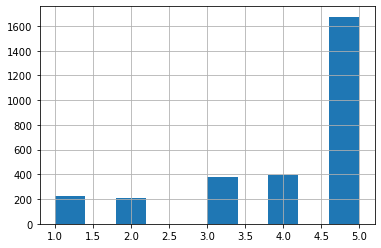

In [49]:
df['score'].hist()

In [50]:
def rating_to_label(rating):
    if rating > 3:
        return 1
    else:
        return 0
    
df['y'] = df['score'].apply(lambda x: rating_to_label(x))

In [51]:
df.head()

,score,review,y
0,2.0,Dirty Room Stayed at the Bellagio for the firs...,0
1,5.0,Great vacation!! Beautiful well kept room with...,1
2,4.0,Fantastic Experience at Bellagio We had a wond...,1
3,4.0,Beautiful but $22 for water? I had a great sta...,1
4,5.0,A perfect Weekend getaway! The hotel is wheelc...,1


In [52]:
df["y"].value_counts()

1    2070
0     819
Name: y, dtype: int64

**2. Feature**

모델의 Feature 변수는 리뷰에서 추출된 형태소와 그들의 중요도를 나타나는 tf_idf_vect로 대체한다.

## 4-2. Training set / Test set 나누기

In [53]:
from sklearn.model_selection import train_test_split

In [54]:
x = tf_idf_vect
y = df['y']

In [55]:
x.shape

(2889, 7490)

In [56]:
y.shape

(2889,)

In [57]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=1)

In [58]:
x_train.shape, y_train.shape

((2022, 7490), (2022,))

In [59]:
x_test.shape, y_test.shape

((867, 7490), (867,))

## 4-3. 모델 학습

### 1. Logistic Regression 모델 학습

In [60]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [61]:
# fit in training set
lr = LogisticRegression(random_state = 0)
lr.fit(x_train, y_train)

LogisticRegression(random_state=0)

In [62]:
# predict in test set
y_pred = lr.predict(x_test)

분류 결과 평가

In [63]:
# classification result for test set

print('accuracy: %.2f' % accuracy_score(y_test, y_pred))
print('precision: %.2f' % precision_score(y_test, y_pred))
print('recall: %.2f' % recall_score(y_test, y_pred))
print('F1: %.2f' % f1_score(y_test, y_pred))

accuracy: 0.89
precision: 0.90
recall: 0.96
F1: 0.93


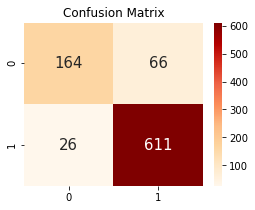

In [64]:
# confusion matrix

from sklearn.metrics import confusion_matrix

confu = confusion_matrix(y_true = y_test, y_pred = y_pred)

plt.figure(figsize=(4, 3))
sns.heatmap(confu, annot=True, annot_kws={'size':15}, cmap='OrRd', fmt='.10g')
plt.title('Confusion Matrix')
plt.show()

모델 평가결과를 살펴보면, 모델이 지나치게 긍정(“1”)으로만 예측하는 경향이 있다. 따라서 긍정 리뷰는 잘 예측하지만, 부정 리뷰에 대한 예측 정확도가 매우 낮다. 이는 샘플데이터의 클래스 불균형으로 인한 문제로 보이므로 클래스 불균형 조정을 진행한다.

### 2. 샘플링 재조정

In [65]:
df['y'].value_counts()

1    2070
0     819
Name: y, dtype: int64

In [66]:
positive_random_idx = df[df['y']==1].sample(819, random_state=1).index.tolist()
negative_random_idx = df[df['y']==0].sample(819, random_state=1).index.tolist()
# random_state : random 함수의 seed값 -> random 값을 고정

In [67]:
random_idx = positive_random_idx + negative_random_idx
x = tf_idf_vect[random_idx]
y = df['y'][random_idx]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=12)

In [68]:
x_train.shape, y_train.shape

((1228, 7490), (1228,))

In [69]:
x_test.shape, y_test.shape

((410, 7490), (410,))

### 3. Logistic Regression 모델 재학습

In [70]:
lr2 = LogisticRegression(random_state = 0)
lr2.fit(x_train, y_train)
y_pred = lr2.predict(x_test)

분류 결과 평가

In [71]:
# classification result for test set

print('accuracy: %.2f' % accuracy_score(y_test, y_pred))
print('precision: %.2f' % precision_score(y_test, y_pred))
print('recall: %.2f' % recall_score(y_test, y_pred))
print('F1: %.2f' % f1_score(y_test, y_pred))

accuracy: 0.90
precision: 0.93
recall: 0.85
F1: 0.89


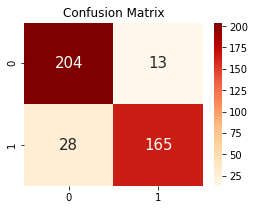

In [72]:
# confusion matrix

from sklearn.metrics import confusion_matrix

confu = confusion_matrix(y_true = y_test, y_pred = y_pred)

plt.figure(figsize=(4, 3))
sns.heatmap(confu, annot=True, annot_kws={'size':15}, cmap='OrRd', fmt='.10g')
plt.title('Confusion Matrix')
plt.show()

이제 모델이 “긍정적인” 케이스와 “부정적인” 케이스를 모두 적당히 잘 맞춘 것을 확인할 수 있다.

# 5. 긍정 / 부정 키워드 분석

Logistic Regression 모델을 이용하여 긍/부정 키워드를 추출한다.

추출된 키워드를 통해서 이용자가 느끼는 호텔의 장,단점을 파악할 수 있고, 이를 기반으로 앞으로 유지해야 할 좋은 서비스와 개선이 필요한 아쉬운 서비스에 대해서도 어느정도 판단할 수 있다.

Logistic Regression 모델에 각 단어의 coeficient를 시각화

In [73]:
lr2.coef_

array([[ 0.05487177,  0.06044156, -0.01859607, ...,  0.07650736,
         0.        ,  0.        ]])

<BarContainer object of 7490 artists>

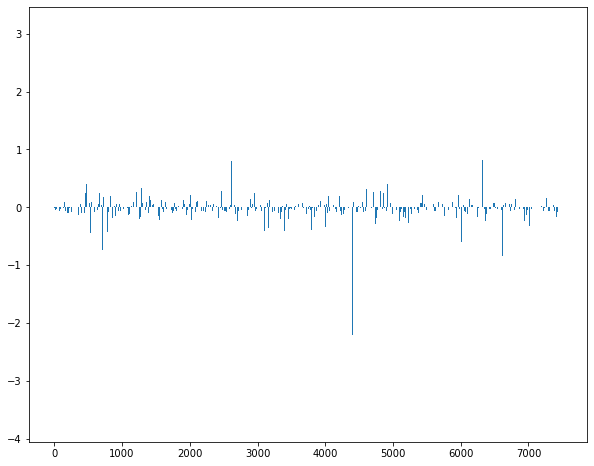

In [74]:
# print logistic regression's coef

plt.figure(figsize=(10, 8))
plt.bar(range(len(lr2.coef_[0])), lr2.coef_[0])

* 계수가 양인 경우 : 단어가 긍정적인 영향을 미쳤다
* 계수가 음인 경우 : 단어가 부정적인 영향을 미쳤다
    
-> 이 계수들을 크기순으로 정렬하면, 긍정 / 부정 키워드를 출력하는 지표가 된다.

 "긍정 키워드"와 "부정 키워드"의 Top 5를 각각 출력

In [75]:
print(sorted(((value, index) for index, value in enumerate(lr2.coef_[0])), reverse = True)[:5])
print(sorted(((value, index) for index, value in enumerate(lr2.coef_[0])), reverse = True)[-5:])
# enumerate: 인덱스 번호와 컬렉션의 원소를 tuple형태로 반환함 : 단어의 coeficient와 index가 출력

[(3.122499890599242, 3033), (2.169637065351352, 828), (2.0262771094363883, 2463), (1.8216060969165637, 7390), (1.819569997206938, 1413)]
[(-1.5098316594293253, 4525), (-1.5276557746834711, 2051), (-1.6242272971497915, 5561), (-2.2019306496775317, 4402), (-3.710872787574138, 4433)]


전체 단어가 포함한 "긍정 키워드 리스트"와 "부정 키워드 리스트"를 정의하고 출력

In [76]:
coef_pos_index = sorted(((value, index) for index, value in enumerate(lr2.coef_[0])), reverse = True)
coef_neg_index = sorted(((value, index) for index, value in enumerate(lr2.coef_[0])), reverse = False)
coef_pos_index

[(3.122499890599242, 3033),
 (2.169637065351352, 828),
 (2.0262771094363883, 2463),
 (1.8216060969165637, 7390),
 (1.819569997206938, 1413),
 (1.776859815758738, 904),
 (1.7208186626194606, 873),
 (1.628006876185722, 7094),
 (1.6271321446402545, 469),
 (1.6058714663933995, 2359),
 (1.5851038283664398, 7122),
 (1.5312175859619876, 6288),
 (1.5222032832648833, 1497),
 (1.4527557815452223, 500),
 (1.3728787308850718, 6603),
 (1.3508635108659104, 4767),
 (1.3324688555436608, 6842),
 (1.282701484509128, 3935),
 (1.2796910866250752, 4850),
 (1.2487350852467518, 2843),
 (1.1870211671836248, 3194),
 (1.1610341134288817, 463),
 (1.142576256522432, 2597),
 (1.1225053298076928, 2796),
 (1.0264798857579882, 6242),
 (1.0077583440835385, 3728),
 (0.9668254332692925, 3551),
 (0.9632535773375897, 4918),
 (0.9433186151868695, 729),
 (0.9414107076644412, 2252),
 (0.9362184378293762, 3885),
 (0.9043406326651402, 7369),
 (0.8873417669771704, 4374),
 (0.886503539489005, 743),
 (0.8683102794317207, 3934),
 

index를 단어로 변환하여 "긍정 키워드 리스트"와 "부정 키워드 리스트"의 Top 20 단어를 출력

In [77]:
invert_index_vectorizer = {v: k for k, v in cv.vocabulary_.items()}
invert_index_vectorizer

# invert_index_vectorizer = {v: k for k, v in word_token.to}
# invert_index_vectorizer

{2051: 'dirty',
 5561: 'room',
 6290: 'stayed',
 666: 'at',
 6603: 'the',
 873: 'bellagio',
 2767: 'for',
 2698: 'first',
 6685: 'time',
 2437: 'ever',
 7403: 'work',
 6842: 'trip',
 3091: 'had',
 5407: 'requested',
 2242: 'early',
 1334: 'check',
 3398: 'in',
 7126: 'via',
 2848: 'front',
 1987: 'desk',
 1327: 'chat',
 4536: 'on',
 3290: 'hotels',
 1487: 'com',
 500: 'and',
 7233: 'was',
 4433: 'not',
 6722: 'told',
 6708: 'to',
 2670: 'fill',
 4599: 'out',
 534: 'anything',
 359: 'advance',
 547: 'app',
 5748: 'secure',
 6624: 'they',
 2794: 'found',
 4111: 'me',
 496: 'an',
 284: 'accessible',
 7311: 'which',
 2995: 'good',
 6988: 'until',
 2371: 'entered',
 7042: 'used',
 5209: 'razor',
 945: 'blade',
 809: 'bathroom',
 1723: 'counter',
 6763: 'towels',
 7293: 'were',
 7375: 'with',
 6249: 'stains',
 6608: 'them',
 6617: 'there',
 3095: 'hair',
 6654: 'throughout',
 912: 'between',
 838: 'bed',
 5856: 'sheets',
 3033: 'great',
 7058: 'vacation',
 828: 'beautiful',
 7290: 'well',
 3

In [78]:
len(invert_index_vectorizer)

7490

In [79]:
for coef in coef_pos_index[:20]:
    print(invert_index_vectorizer[coef[1]], coef[0])

great 3.122499890599242
beautiful 2.169637065351352
excellent 2.0262771094363883
wonderful 1.8216060969165637
clean 1.819569997206938
best 1.776859815758738
bellagio 1.7208186626194606
vegas 1.628006876185722
amazing 1.6271321446402545
enjoyed 1.6058714663933995
very 1.5851038283664398
stay 1.5312175859619876
comfortable 1.5222032832648833
and 1.4527557815452223
the 1.3728787308850718
perfect 1.3508635108659104
trip 1.3324688555436608
loved 1.282701484509128
place 1.2796910866250752
friendly 1.2487350852467518


**결론 : 이용객들이 주로 호텔의 청결도(clean)와 안락함(comfortable)에 만족하였다.**

In [80]:
for coef in coef_neg_index[:20]:
    print(invert_index_vectorizer[coef[1]], coef[0])

not -3.710872787574138
no -2.2019306496775317
room -1.6242272971497915
dirty -1.5276557746834711
old -1.5098316594293253
poor -1.465321626648731
overpriced -1.4200887244992042
rude -1.3185474886071793
disappointed -1.2922355763451905
for -1.271740951917895
they -1.2330479227190363
terrible -1.2149314501349047
but -1.2100727841874062
shower -1.1870624207905334
price -1.1270130897941624
pay -1.0383888638515346
that -1.0246058205040953
what -1.0060652629619578
don -1.0008382241508582
bad -0.9880076690441579


**결론 : 이용객들이 주로 호텔이 청결하지 않으며 오래됐고 서비스가 무례하다며 불만족하였다.**

# 6. 호텔리뷰 감성 (긍정/부정) 예측함수

## 6-1. Logistic Regression

In [105]:
def sentiment_predict_lr(input_text):

    #입력 텍스트에 대한 전처리 수행
    input_text = data_text_cleaning(input_text)
    #input_text = ["".join(input_text)]

    # 입력 텍스트의 피처 벡터화
    st_tfidf = cv.transform([input_text])
    tf_idf_vect = tfidf_vectorizer.transform(st_tfidf)
    tf_idf_vect = tf_idf_vect.toarray()

    # 최적 감성 분석 모델에 적용하여 감성 분석 평가
    score = float(lr2.predict(tf_idf_vect))

    #예측 결과 출력
    if(score > 0.5):
        print('예측 결과: ->> 긍정 감성')
    else :
        print('예측 결과: ->> 부정 감성')

In [115]:
sentiment_predict_lr('it was nice')

예측 결과: ->> 긍정 감성


In [116]:
sentiment_predict_lr('it is not bad price')

예측 결과: ->> 부정 감성


In [117]:
sentiment_predict_lr('This was the second time we stayed at Bellagio in 6 months. We love the location. Easy access on foot to go shopping, dining, or shows. Room is very clean and great space. Many restaurants and high end shopping to enjoy. Several nice restaurants in the hotel. Yellowtail Restaurant... yummy!!!!')

예측 결과: ->> 긍정 감성


In [118]:
#3점 리뷰
sentiment_predict_lr('I stayed in the Bellagio suite and still the house keeping service as well as the service desk fulfillment of requests was very bad. If you miss the regular room cleaning schedule…your room will not be cleaned even if you request multiple times')

예측 결과: ->> 긍정 감성


In [119]:
#3점 리뷰
sentiment_predict_lr('Hotel over all is very nice. Aracelis went above and beyond to assist us...... Im a Amex Platinum card holder, an MGM rewards member, had reservations at Prime and Lago were we spend well over 1000 dollars. At the time of arrival, the person who helped us (Rosemary from Philippines) was not to helpful. She offered an upgarde to another room for an additional 450$ per night, even though as an Amex Platinum member we are supposed to receive this at no additional cost when available. On the second day of our stay, Aracelis was able to provide the service that was rightfully expected. In the original room that we were assigned (22 604) there was mold in the shower, dust on the furniture, drawers were dirty, shower head sprayed everywhere, there was glue and stains in the wall paper behind the bed specially. The quality of the toiletries was terrible')

예측 결과: ->> 부정 감성


* comment : 3점리뷰에 대한 정확한 감성(긍정/부정) 예측을 위해서 더 많은 데이터가 필요함 

In [79]:
# AUC Score 확인
from sklearn.metrics import roc_auc_score

In [81]:
# classification result for test set
print('accuracy: %.2f' % accuracy_score(y_test, y_pred))
print('precision: %.2f' % precision_score(y_test, y_pred))
print('recall: %.2f' % recall_score(y_test, y_pred))
print('F1: %.2f' % f1_score(y_test, y_pred))

AUC_lr = roc_auc_score(y_test,y_pred)
print('AUC: %.8f' % AUC_lr)

accuracy: 0.90
precision: 0.93
recall: 0.85
F1: 0.89
AUC: 0.89750722


### 그리드 서치

하이퍼파라미터를 튜닝하여 일반화 성능을 개선 

-> 그리드 서치로서 관심 있는 하이퍼파라미터들을 대상으로 가능한 모든 조합을 시도

데이터를 train, validation, test set으로 나누는 방법은 성능이 좋고 널리 사용된다.
그러나 데이터를 나누는 방법에 매우 민감하므로 일반화 성능을 더 잘 평가하기 위해서는 훈련세트와 검정세트를 한번만 나누지 않고 교차 검증(cross validation)을 사용해서 각 매개변수의 조합의 성능을 평가할 수 있다.

* 하이퍼파라미터 탐색을 자동화해 주는 도구
* 탐색할 매개변수를 나열하면 교차 검증을 수행하여 가장 좋은 검증 점수의 매개변수 조합을 선택, 마지막으로 이 매개변수 조합으로 최종 모델을 훈련

In [72]:
from sklearn.model_selection import GridSearchCV # 하이퍼 파라미터 최적화

In [73]:
clf = LogisticRegression(random_state=0)
params = {'C': [15, 18, 19, 20, 22]}
grid_cv = GridSearchCV(clf, param_grid=params, cv=3, scoring='accuracy', verbose=1)
grid_cv.fit(x_train, y_train)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


GridSearchCV(cv=3, estimator=LogisticRegression(random_state=0),
             param_grid={'C': [15, 18, 19, 20, 22]}, scoring='accuracy',
             verbose=1)

In [74]:
# 최적의 평가 파라미터는 grid_cv.best_estimator_에 저장됨
print(grid_cv.best_params_, grid_cv.best_score_)# 가장 적합한 파라메터, 최고 정확도 확인

{'C': 15} 0.8819229928240603


## 6-2. SVM

In [82]:
from sklearn.svm import SVC

svm=SVC()
svm.fit(x_train,y_train)

SVC()

In [83]:
def sentiment_predict_svm(input_text):

    #입력 텍스트에 대한 전처리 수행
    input_text = data_text_cleaning(input_text)
    #input_text = ["".join(input_text)]

    # 입력 텍스트의 피처 벡터화
    st_tfidf = cv.transform([input_text])
    tf_idf_vect = tfidf_vectorizer.transform(st_tfidf)

    # 최적 감성 분석 모델에 적용하여 감성 분석 평가
    st_predict = float(svm.predict(st_tfidf))

    #예측 결과 출력
    if(st_predict == 0):
        print('예측 결과: ->> 부정 감성')
    else :
        print('예측 결과: ->> 긍정 감성')

In [84]:
sentiment_predict_svm('it was nice')

예측 결과: ->> 긍정 감성


In [85]:
sentiment_predict_svm('Hotel over all is very nice. Aracelis went above and beyond to assist us...... Im a Amex Platinum card holder, an MGM rewards member, had reservations at Prime and Lago were we spend well over 1000 dollars. At the time of arrival, the person who helped us (Rosemary from Philippines) was not to helpful. She offered an upgarde to another room for an additional 450$ per night, even though as an Amex Platinum member we are supposed to receive this at no additional cost when available. On the second day of our stay, Aracelis was able to provide the service that was rightfully expected. In the original room that we were assigned (22 604) there was mold in the shower, dust on the furniture, drawers were dirty, shower head sprayed everywhere, there was glue and stains in the wall paper behind the bed specially. The quality of the toiletries was terrible')

예측 결과: ->> 부정 감성


In [156]:
sentiment_predict_svm('Subpar Dirty hallways and less than average room.')

예측 결과: ->> 부정 감성


In [86]:
# predict in test set
y_pred_svm = svm.predict(x_test)

In [87]:
# classification result for test set
print('accuracy: %.2f' % accuracy_score(y_test, y_pred_svm))
print('precision: %.2f' % precision_score(y_test, y_pred_svm))
print('recall: %.2f' % recall_score(y_test, y_pred_svm))
print('F1: %.2f' % f1_score(y_test, y_pred_svm))

AUC_svm = roc_auc_score(y_test,y_pred_svm)
print('AUC: %.8f' % AUC_svm)

accuracy: 0.90
precision: 0.94
recall: 0.84
F1: 0.89
AUC: 0.89923832


### 그리드 서치

In [184]:
clf = SVC(random_state=0)
params = {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma' : [0.001, 0.01, 0.1, 1, 10, 100]}
grid_cv = GridSearchCV(clf, param_grid=params, cv=3, scoring='accuracy', verbose=1)
grid_cv.fit(x_train, y_train)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


GridSearchCV(cv=3, estimator=SVC(random_state=0),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
             scoring='accuracy', verbose=1)

In [185]:
# 최적의 평가 파라미터는 grid_cv.best_estimator_에 저장됨
print(grid_cv.best_params_, grid_cv.best_score_)# 가장 적합한 파라메터, 최고 정확도 확인

{'C': 10, 'gamma': 0.01} 0.8827379887490806


## 6-3. Decision Tree

In [88]:
from sklearn.tree import DecisionTreeRegressor

dt=DecisionTreeRegressor()
dt.fit(x_train,y_train)

DecisionTreeRegressor()

In [89]:
def sentiment_predict_dt(input_text):

    #입력 텍스트에 대한 전처리 수행
    input_text = data_text_cleaning(input_text)
    #input_text = ["".join(input_text)]

    # 입력 텍스트의 피처 벡터화
    st_tfidf = cv.transform([input_text])
    tf_idf_vect = tfidf_vectorizer.transform(st_tfidf)

    # 최적 감성 분석 모델에 적용하여 감성 분석 평가
    st_predict = float(dt.predict(st_tfidf))

    #예측 결과 출력
    if(st_predict > 0.5):
        print('예측 결과: ->> 부정 감성')
    else :
        print('예측 결과: ->> 긍정 감성')

In [90]:
sentiment_predict_dt('it was nice')

예측 결과: ->> 긍정 감성


In [91]:
sentiment_predict_dt('Hotel over all is very nice. Aracelis went above and beyond to assist us...... Im a Amex Platinum card holder, an MGM rewards member, had reservations at Prime and Lago were we spend well over 1000 dollars. At the time of arrival, the person who helped us (Rosemary from Philippines) was not to helpful. She offered an upgarde to another room for an additional 450$ per night, even though as an Amex Platinum member we are supposed to receive this at no additional cost when available. On the second day of our stay, Aracelis was able to provide the service that was rightfully expected. In the original room that we were assigned (22 604) there was mold in the shower, dust on the furniture, drawers were dirty, shower head sprayed everywhere, there was glue and stains in the wall paper behind the bed specially. The quality of the toiletries was terrible')

예측 결과: ->> 부정 감성


In [157]:
sentiment_predict_dt('Subpar Dirty hallways and less than average room.')

예측 결과: ->> 긍정 감성


In [247]:
sentiment_predict_dt('Dirty Room Stayed at the Bellagio for the first time ever for a work trip.')

예측 결과: ->> 부정 감성


In [92]:
# predict in test set
y_pred_dt = dt.predict(x_test)

In [93]:
# classification result for test set
print('accuracy: %.2f' % accuracy_score(y_test, y_pred_dt))
print('precision: %.2f' % precision_score(y_test, y_pred_dt))
print('recall: %.2f' % recall_score(y_test, y_pred_dt))
print('F1: %.2f' % f1_score(y_test, y_pred_dt))

AUC_dt = roc_auc_score(y_test,y_pred_dt)
print('AUC: %.8f' % AUC_dt)

accuracy: 0.79
precision: 0.77
recall: 0.78
F1: 0.78
AUC: 0.78980922


### 그리드 서치

In [202]:
clf = DecisionTreeRegressor(random_state=0)
# min_impurity_decrease : 최소 불순도(지니계수)가 낮다 = 엔트로피가 낮다 = 데이터의 균일도가 높다  
params = {"max_depth": [1, 5, 10],
          "min_samples_split": [2, 3],
          "min_impurity_decrease": [0.0001, 0.0002, 0.0003, 0.0004, 0.0005]}
grid_cv = GridSearchCV(clf, param_grid=params)
grid_cv.fit(x_train, y_train)

GridSearchCV(estimator=DecisionTreeRegressor(random_state=0),
             param_grid={'max_depth': [1, 5, 10],
                         'min_impurity_decrease': [0.0001, 0.0002, 0.0003,
                                                   0.0004, 0.0005],
                         'min_samples_split': [2, 3]})

In [203]:
# 최적의 평가 파라미터는 grid_cv.best_estimator_에 저장됨
print(grid_cv.best_params_, grid_cv.best_score_)# 가장 적합한 파라메터, 최고 정확도 확인

{'max_depth': 5, 'min_impurity_decrease': 0.0001, 'min_samples_split': 2} 0.25597922602220174


## 6-4. Random Forest

In [94]:
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier()

In [239]:
def sentiment_predict_rf(input_text):

    #입력 텍스트에 대한 전처리 수행
    input_text = data_text_cleaning(input_text)
    #input_text = ["".join(input_text)]

    # 입력 텍스트의 피처 벡터화
    st_tfidf = cv.transform([input_text])
    tf_idf_vect = tfidf_vectorizer.transform(st_tfidf)

    # 최적 감성 분석 모델에 적용하여 감성 분석 평가
    st_predict = float(rf.predict(st_tfidf))

    #예측 결과 출력
    if(st_predict > 0.5):
        print('예측 결과: ->> 부정 감성')
    else :
        print('예측 결과: ->> 긍정 감성')

In [241]:
sentiment_predict_rf('Hotel over all is very nice. Aracelis went above and beyond to assist us...... Im a Amex Platinum card holder, an MGM rewards member, had reservations at Prime and Lago were we spend well over 1000 dollars. At the time of arrival, the person who helped us (Rosemary from Philippines) was not to helpful. She offered an upgarde to another room for an additional 450$ per night, even though as an Amex Platinum member we are supposed to receive this at no additional cost when available. On the second day of our stay, Aracelis was able to provide the service that was rightfully expected. In the original room that we were assigned (22 604) there was mold in the shower, dust on the furniture, drawers were dirty, shower head sprayed everywhere, there was glue and stains in the wall paper behind the bed specially. The quality of the toiletries was terrible')

예측 결과: ->> 부정 감성


In [245]:
sentiment_predict_rf('Dirty hallways')

예측 결과: ->> 긍정 감성


In [249]:
sentiment_predict_rf('Dirty Room Stayed at the Bellagio for the first time ever for a work trip.')

예측 결과: ->> 부정 감성


In [99]:
# predict in test set
y_pred_rf = rf.predict(x_test)

In [100]:
# classification result for test set
print('accuracy: %.2f' % accuracy_score(y_test, y_pred_rf))
print('precision: %.2f' % precision_score(y_test, y_pred_rf))
print('recall: %.2f' % recall_score(y_test, y_pred_rf))
print('F1: %.2f' % f1_score(y_test, y_pred_rf))

AUC_rf = roc_auc_score(y_test,y_pred_rf)
print('AUC: %.8f' % AUC_rf)

accuracy: 0.87
precision: 0.91
recall: 0.81
F1: 0.85
AUC: 0.86727872


### 그리드 서치

In [204]:
clf = RandomForestClassifier(random_state=0)
# min_impurity_decrease : 최소 불순도(지니계수)가 낮다 = 엔트로피가 낮다 = 데이터의 균일도가 높다  
params = {"max_depth": [1, 5, 10],
          "min_samples_split": [2, 3],
          "min_impurity_decrease": [0.0001, 0.0002, 0.0003, 0.0004, 0.0005]}
grid_cv = GridSearchCV(clf, param_grid=params)
grid_cv.fit(x_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [1, 5, 10],
                         'min_impurity_decrease': [0.0001, 0.0002, 0.0003,
                                                   0.0004, 0.0005],
                         'min_samples_split': [2, 3]})

In [205]:
# 최적의 평가 파라미터는 grid_cv.best_estimator_에 저장됨
print(grid_cv.best_params_, grid_cv.best_score_)# 가장 적합한 파라메터, 최고 정확도 확인

{'max_depth': 10, 'min_impurity_decrease': 0.0001, 'min_samples_split': 3} 0.8542359382777501


## 6-5. KNN

In [101]:
from sklearn.neighbors import KNeighborsRegressor

knn=KNeighborsRegressor()
knn.fit(x_train,y_train)

KNeighborsRegressor()

In [102]:
def sentiment_predict_knn(input_text):

    #입력 텍스트에 대한 전처리 수행
    input_text = data_text_cleaning(input_text)
    #input_text = ["".join(input_text)]

    # 입력 텍스트의 피처 벡터화
    st_tfidf = cv.transform([input_text])
    tf_idf_vect = tfidf_vectorizer.transform(st_tfidf)

    # 최적 감성 분석 모델에 적용하여 감성 분석 평가
    st_predict = float(knn.predict(st_tfidf))

    #예측 결과 출력
    if(st_predict == 0):
        print('예측 결과: ->> 부정 감성')
    else :
        print('예측 결과: ->> 긍정 감성')

In [103]:
sentiment_predict_knn('it was nice')

예측 결과: ->> 긍정 감성


In [104]:
sentiment_predict_knn('Hotel over all is very nice. Aracelis went above and beyond to assist us...... Im a Amex Platinum card holder, an MGM rewards member, had reservations at Prime and Lago were we spend well over 1000 dollars. At the time of arrival, the person who helped us (Rosemary from Philippines) was not to helpful. She offered an upgarde to another room for an additional 450$ per night, even though as an Amex Platinum member we are supposed to receive this at no additional cost when available. On the second day of our stay, Aracelis was able to provide the service that was rightfully expected. In the original room that we were assigned (22 604) there was mold in the shower, dust on the furniture, drawers were dirty, shower head sprayed everywhere, there was glue and stains in the wall paper behind the bed specially. The quality of the toiletries was terrible')

예측 결과: ->> 부정 감성


In [246]:
sentiment_predict_knn('Subpar Dirty hallways and less than average room.')

예측 결과: ->> 긍정 감성


In [251]:
sentiment_predict_knn('Dirty Room Stayed at the Bellagio for the first time ever for a work trip.')

예측 결과: ->> 긍정 감성


In [105]:
# predict in test set
y_pred_knn = knn.predict(x_test)

In [107]:
# classification result for test set
# print('accuracy: %.2f' % accuracy_score(y_test, y_pred_knn))
# print('precision: %.2f' % precision_score(y_test, y_pred_knn))
# print('recall: %.2f' % recall_score(y_test, y_pred_knn))
# print('F1: %.2f' % f1_score(y_test, y_pred_knn))

# AUC Score 확인
AUC_knn = roc_auc_score(y_test,y_pred_knn)
print('AUC: %.8f' % AUC_knn)

AUC: 0.91040090


### 그리드 서치

https://blog.naver.com/PostView.nhn?isHttpsRedirect=true&blogId=baek2sm&logNo=221763552440&redirect=Dlog&widgetTypeCall=true&directAccess=false

In [213]:
clf = KNeighborsRegressor()
# min_impurity_decrease : 최소 불순도(지니계수)가 낮다 = 엔트로피가 낮다 = 데이터의 균일도가 높다  
params = [{'n_neighbors' : range(3,20)}]
grid_cv = GridSearchCV(clf, param_grid=params)
grid_cv.fit(x_train, y_train)

GridSearchCV(estimator=KNeighborsRegressor(),
             param_grid=[{'n_neighbors': range(3, 20)}])

In [214]:
# 최적의 평가 파라미터는 grid_cv.best_estimator_에 저장됨
print(grid_cv.best_params_, grid_cv.best_score_)# 가장 적합한 파라메터, 최고 정확도 확인

{'n_neighbors': 14} 0.5326602557421822


## 6-6. LSTM

In [96]:
from tensorflow.keras.layers import Embedding, Dense, LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [97]:
embedding_dim = 100
hidden_units = 128

In [98]:
vocab_size = len(word_token)

In [99]:
model = Sequential()
model.add(Embedding(vocab_size, embedding_dim))
model.add(LSTM(hidden_units))
model.add(Dense(1, activation='sigmoid'))

In [100]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

In [101]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(x_train, y_train, epochs=15, callbacks=[es, mc], batch_size=64)

Epoch 1/15


InvalidArgumentError:  TypeError: 'SparseTensor' object is not subscriptable
Traceback (most recent call last):

  File "C:\Users\gilon\anaconda3\lib\site-packages\tensorflow\python\ops\script_ops.py", line 242, in __call__
    return func(device, token, args)

  File "C:\Users\gilon\anaconda3\lib\site-packages\tensorflow\python\ops\script_ops.py", line 131, in __call__
    ret = self._func(*args)

  File "C:\Users\gilon\anaconda3\lib\site-packages\tensorflow\python\autograph\impl\api.py", line 302, in wrapper
    return func(*args, **kwargs)

  File "C:\Users\gilon\anaconda3\lib\site-packages\tensorflow\python\keras\engine\data_adapter.py", line 513, in py_method
    return [slice_array(inp) for inp in flat_inputs]

  File "C:\Users\gilon\anaconda3\lib\site-packages\tensorflow\python\keras\engine\data_adapter.py", line 513, in <listcomp>
    return [slice_array(inp) for inp in flat_inputs]

  File "C:\Users\gilon\anaconda3\lib\site-packages\tensorflow\python\keras\engine\data_adapter.py", line 511, in slice_array
    return training_utils.slice_arrays(data, ind.numpy(),

  File "C:\Users\gilon\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training_utils.py", line 392, in slice_arrays
    entries = [[x[i:i + 1] for i in indices] for x in arrays]

  File "C:\Users\gilon\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training_utils.py", line 392, in <listcomp>
    entries = [[x[i:i + 1] for i in indices] for x in arrays]

  File "C:\Users\gilon\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training_utils.py", line 392, in <listcomp>
    entries = [[x[i:i + 1] for i in indices] for x in arrays]

TypeError: 'SparseTensor' object is not subscriptable


	 [[{{node EagerPyFunc}}]]
	 [[IteratorGetNext]] [Op:__inference_train_function_3195]

Function call stack:
train_function


## 6-7. 각 모델별 AUC score 비교

In [1]:
AUC_compare = [0.886423, 0.847511, 0.75893, 0.81440, 0.518946, 0.827861, 0.812024, 0.850780, 0.5]
AUC_compare

[0.886423,
 0.847511,
 0.75893,
 0.8144,
 0.518946,
 0.827861,
 0.812024,
 0.85078,
 0.5]

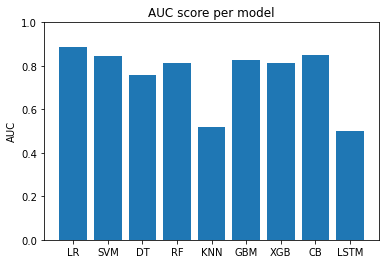

<Figure size 21600x2160 with 0 Axes>

In [8]:
plt.bar(range(len(AUC_compare)), AUC_compare)
plt.title("AUC score per model") #차트 제목
plt.ylabel('AUC')
plt.ylim([0, 1])
plt.xticks([0,1,2,3,4, 5, 6, 7, 8], ['LR', 'SVM', 'DT', 'RF', 'KNN', 'GBM', 'XGB', 'CB', 'LSTM'])
plt.figure(figsize=(300,30))

plt.show()

# 7. 개선점

1. 긍정/부정 키워드에 대한 워드 클라우드를 생성하여 결과를 보다 가시적으로 표현할 것
2. RNN 기반의 LSTM 모델을 추가하여 정확도를 보다 높일 것, 이때 평가 지표로 AUC score 대신 다른 것을 생각해 볼 것 